# TRKA

U ovom projektu ćemo razviti napredni model za kretanje sprintera tokom trke na 100 m. Model ćemo graditi postepeno, dodavajući napredne mehaničke funkcionalnosti jednu po jednu kako bi se razvio realan model za trku.
Sprinter ubrzava duž staze. Potrebno je nacrtati dijagram slobodnog tela sprintera, uključujući samo horizontalne sile tako da dužina vektora odgovara na relativne veličine sila. Pretpostavimo da se sprinter ubrzava konstantnom horizontalnom silom, Fv = 400 N, od tla sve od starta do cilja duž 100m (u proseku za nekoliko koraka), a masa sprintera je m = 80 kg.
Za prikaz dijagrama i dijagrama slobodnog tela, uzećemo u obzir dve horizontalne sile: silu otpora vazduha i vučnu silu. Vučna sila pokreće sprintera zbog mišićnog napora sprintera na tlu. Sa druge strane, sila otpora vazduha suprotstavlja se kretanju sprintera. Pri krajnjoj brzini, ove dve sile biće jednake po veličini ali suprotnog smera.

In [ ]:
import matplotlib.pyplot as plt

F = 400  
m = 80   

a = F / m  

plt.figure(figsize=(6, 3))
plt.title('Dijagram sprintera')

plt.arrow(0, 0, F/100, 0, head_width=0.1, head_length=20, fc='blue', ec='blue', label='Vucna sila')

otpor_vazduha = F * 0.1
plt.arrow(F/100, 0, -otpor_vazduha/100, 0, head_width=0.1, head_length=20, fc='red', ec='red', label='Otpor vazduha')

plt.text(F/100 + 10, 0.05, '400 N', color='blue')
plt.text(F/100 - otpor_vazduha/100 - 60, 0.05, f'{otpor_vazduha:.0f} N', color='red')

plt.xlim(-50, 450)
plt.ylim(-1, 1)
plt.gca().axes.get_yaxis().set_visible(False)
plt.axhline(0, color='black')  
plt.show()

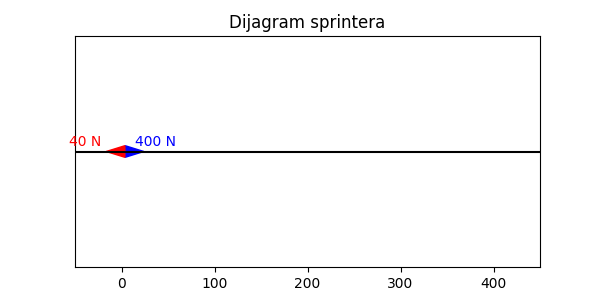

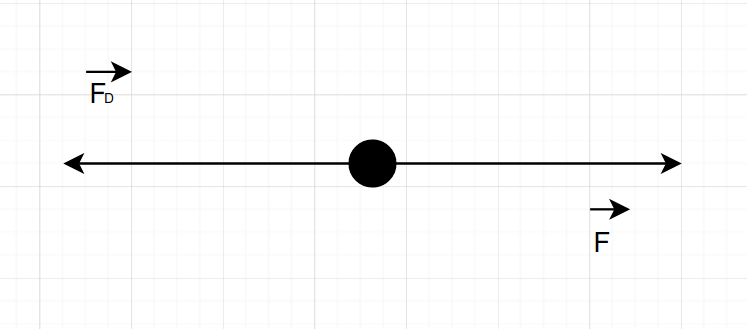

Naredna slika predstavlja dijagram slobodnog tela sprintera. Dužina ovih strelica, odnosno vektora biće jednaka pri krajnjoj brzini kako bi se odrazilo da su veličine sila iste. Ovaj dijagram slobodnog tela efektivno pokazuje ravnotežu sila pri krajnjoj brzini, gde je vučnoj sili tačno suprotstavljena sila otpora vazduha, što rezultira da ukupnog ubrzanja nema.


Pronađimo položaj (x(t)) sprintera kao funkciju vremena. Znamo da je pređeni put $ S = Vt + \frac{1}{2} a t^2 $ . Kako smo u stanju mirovanja, nama je $V = 0$ pa tako imamo $ S =  \frac{1}{2} a t^2 $ što nam je zapravo jednačina položaja sprintera.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


F_v = 400  
m = 80  


def pozicija(t):
    a = F_v / m  
    return 1/2 * a * t**2 


t_tacke = np.linspace(0, 10, 100)  
x = pozicija(t_tacke)


plt.plot(t_tacke, x)
plt.xlabel('Vreme (s)')
plt.ylabel('Pozicija (m)')
plt.title('Položaj sprintera kao funkcija vremena')
plt.show()

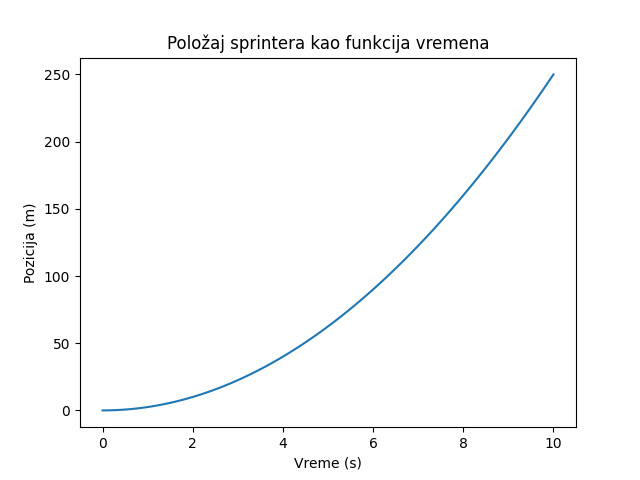

Dakle, ovim smo pokazali da sprinter primenjuje vreme t = 6.3 s kako bi stigao do linije od 100 m. Ovo je malo brže u poređenju sa pravim trkama. Međutim, pravi sprinteri su ograničeni otporom vazduha. Hajde da uvedemo model za otpor vazduha uz pretpostavku da je sila otpora vazduha opisana kvadratnim zakonom:

$ D = \frac{1}{2}ρC_D A(v − w)^2 $

gde je $ρ$ gustina vazduha, $A$ je površina poprečnog preseka trkača, $C_D$ je
koeficijent otpora, $v$ je brzina trkača, a $w$ je brzina vazduha. Neka je $ρ = 1.293 \frac{kg}{m^3}$, a za trkača možemo pretpostaviti $ A = 0.45 m^2 $, a
$C_D = 1.2$. U početku možete pretpostaviti da nema vetra i da smo u stanju mirovanja: $ v = 0 \frac{m}{s}$ i $w = 0 \frac{m}{s} $.
Pretpostavimo da na trkača utiču samo konstantna pokretačka sila i sila otpora vazduha. Koristimo drugi Njutnov zakon  $F_v= ma$ da bismo pronašli izraz za ubrzanje trkača. Kako na trkača utiče sila otpora vazduha sledi: $a=\frac{F_V-D}{m} $


In [ ]:
import numpy as np


rho = 1.293 
A = 0.45  
CD = 1.2  
m = 80  
F_v = 400  
x_krajnje = 100  
w = 0  
t_cilj = 6.3  


dt = 0.01  
t = 0
x = 0
v = 0

while x < x_krajnje:
  
    D = 0.5 * rho * CD * A * (v - w)**2
    
    a = (F_v - D) / m
  
    v += a * dt
    x += v * dt
    t += dt


print("Vreme dolaska na cilj:", round(t, 1), "s")

Uz otpor vazduha, sprinter će za 6.8s pretrčati 100m.

Pomoću Ojlerove metode predstavili smo i izračunali brzinu,poziciju i ubrzanje trkača kao funkciju vremena, gde trkač kreće iz mirovanja u trenutku. Imamo gorenavedene konstante, dok smo vreme, početnu brzinu i položaj inicijalizovali. Kao vremenski korak uzeli smo dt=0.1 kako bi rezultat bio što precizniji, a samim tim kako bi se program što brže izvršio. Dodate su prazne liste za položaj, brzinu, ubrzanje i vreme i u svakom koraku ubacujemo rezultate u njih. Petlja će se izvršiti dokle god nam je vreme manje od 10s, zato što smo uzeli slučaj kada sprinter pređe 10m u 1s. Računamo silu otpora vazduha i ubrzanje preko naše novodobijene formule. Potom izvršavamo Ojlerovu metodu za izračunavanje položaja i brzine u datom vremenskom trenutku.
Da nemamo otpor vazduha, brzina bi se konstantno povećavala, što ne bi u realnosti imalo smisla.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

rho = 1.293 
A = 0.45  
CD = 1.2  
w=0
m = 80  
F_v = 400  
v=0
t=0
x=0
dt=0.1
X=[]
T=[]
V=[]
A1=[]
while t<10:
    D=0.5*rho*CD*A*(v-w)**2
    a=(F_v-D)/m
    x=x+v*dt
    v=v+a*dt
    t+=dt
    X.append(x)
    T.append(t)
    V.append(v)
    A1.append(a)


plt.plot(T,X)
plt.xlabel('Vreme (s)')
plt.ylabel('Pozicija (m)')
plt.title('Funkcija pozicije od vremena')
plt.grid(True)
plt.show()

plt.plot(T,V)
plt.xlabel('Vreme (s)')
plt.ylabel('Brzina (m/s)')
plt.title('Funkcija brzine od vremena')
plt.grid(True)
plt.show()


plt.plot(T,A1)
plt.xlabel('Vreme (s)')
plt.ylabel('Ubrzanje (m/s)^2')
plt.title('Funkcija ubrzanja od vremena')
plt.grid(True)
plt.show()




Primetimo u prvom grafiku da će pozicija napredovati kako vreme odmiče:

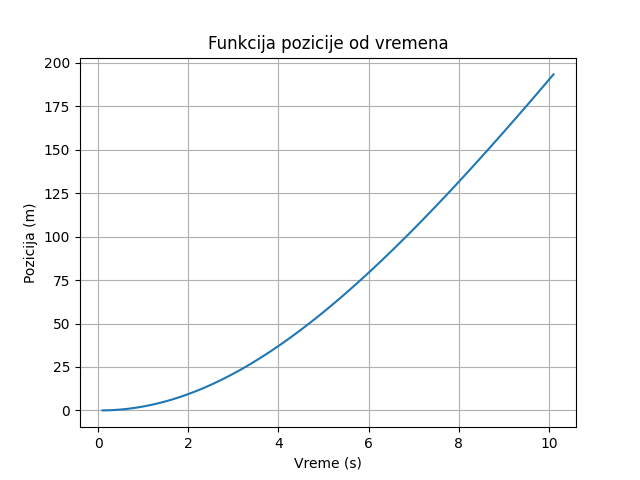

Na ovom grafiku već možemo videti kako brzina brzo raste i sa vremenom usporava i teži da postane konstantna, a samim tim i ubrzanje. To nam je posledica otpora vazduha koja vremenom umanjuje silu koja pokreće trkača. Što trkač brže bude trčao, to će biti i veći otpor vazduha. Eksponencijalno brzina ide ka tome da postane konstantne vrednosti.

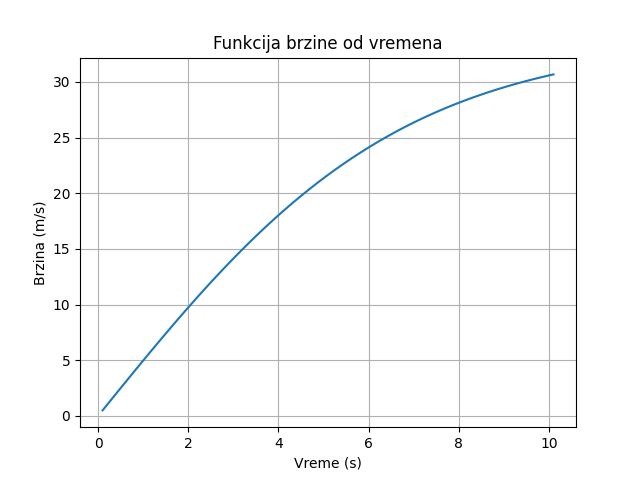

Ovde možemo da vidimo ubrzanje koje je u samom početku najveće, jer je otpor vazduha jednak nuli. Kako se trkač kreće i ubrzava, tako se otpor vazduha povećava a samim tim se i ubrzanje smanjuje i teži da bude nuli nakon određenog trenutka.

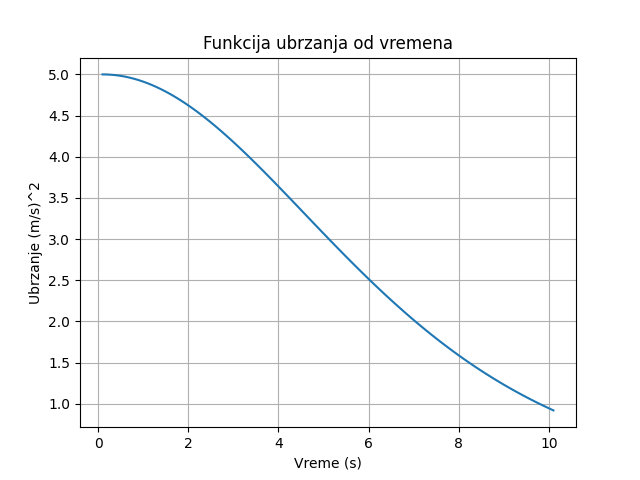

Do sada smo prevazišli jednostavne stvari i idemo korak napred ka objašnjenju na napredniji nivo.
Želimo pokazati da je maksimalna brzina trkača određena datom formulom: $ V_T = \sqrt\frac{2F}{ρC_DA} $ Trkač će možda morati da pretrči više od 100 m da bi postigao ovu brzinu. Ovu  maksimalnu brzinu često zovemo konačnom brzinom jer se brzina povećava dok ne dostigne krajnju brzinu, gde ubrzanje postaje nula. Do sada na trkača utiču samo konstantna vučna sila i sila otpora vazduha. Pošto je
očigledno previše pojednostavljen model da bi bio realan, hajde da model učinimo realističnijim tako što ćemo dodavati nekoliko osobina.
Sada ćemo zanemariti silu otpora vazduha i videćemo da postoji fiziološka granica koliko čovek u stvari može brzo trčati. Pokretačka snaga od trkača bi, stoga, trebalo da se smanji sa brzinom, tako da postoji maksimalna brzina pri kojoj je ubrzanje nula i bez otpora vazduha. Dakle, posle određenog vremena, što je brzina veća, ubrzanje će sve više težiti ka nuli. Primer iz realnog života bi bio umor posle trčanja. Dok ne znamo detaljno fiziološke mehanizme za ovaj efekat, možemo napraviti pojednostavljeni model sile za implementaciju efekta uvođenjem pokretačke sile $F_D$ sa dva člana: konstantan član $F$ i član koji opada sa povećanjem brzine $F_V$ : $F_V = − f_Vv$, tako da je pokretačka sila: $F_D = F + F_V = F − f_Vv$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

rho = 1.293 
A = 0.45  
CD = 1.2  
F_v = 400 
VT=math.sqrt(2*(F_v)/(rho*CD*A))
print("Teorijska maksimalna brzina trkaca je:",VT) 


Numerička vrednost konačne brzine za trkača biće otprilike 33.85 $\frac{m}{s}$

Sada uzimamo u obzir slučaj kada trkač iz čučnja kreće da trči. U tom slučaju, formirana površina poprečnog preseka je manja jer je zgrčen u početnom trenutku i pokretačka sila je mnogo veća tada nego kasnije. U ovom segmentu ne očekujemo da će naglo završiti faza gde se iz čučnja diže uspravno, ali zato očekujemo da se pokretačka sila postepeno smanjuje, a da se paralelno površina poprečnog preseka povećava iz momenta kada trkač prelazi iz zgrčenog u uspravan položaj. Ovo se može aproksimirati preko eksponencijalne funkcije koja zavisi od karakterističnog vremena $t_C$ koje predstavlja vreme prelaska iz čučnja u uspravan položaj: <br>
$F_C = f_c exp(-(\frac{t}{tc})^2) $ <br>
Preko ove funkcije možemo uvideti da kada je t = 0, sila je jednaka $f_c$, to jest biće najveća. Ali kako vreme bude raslo i izjednači se sa $t_c$ eksponencijalno će sila biti $\frac{1}{e} = 0.37$ . Videćemo da će se $f_c$ sila drastično smanjiti. 
Kada smo definisali $f_c$ ukupna pokretačka sila biće: <br>
$F_D = F + f_c exp(-(\frac{t}{tc})^2) − f_v v $ <br>
Uzimamo vrednosti parametara $f_c = 488N$ i $t_c = 0.67s$. Pored toga moramo izmeniti silu otpora vazduha da bismo obuhvatili period prelaska iz čučnja u uspravan položaj. Aproksimiraćemo ovo preko eksponencijalne funkcije: <br>
$ A(t) = A − 0.25A exp(-(\frac{t}{tc})^2)
= A (1 − 0.25 exp(-(\frac{t}{tc})^2)) $ <br>
Površinu poprečnog preseka zamenjujemo u izrazu D sa vremenskim izrazom A(t) i imaćemo dva slučaja: 
1) kada je vreme 0, površina poprečnog preseka se smanjuje za 75% (1-0.25) 
2) kada je vreme koje je mnogo veće od $t_c$ tada se trkač uspravio, površina poprečnog preseka je veća i imamo silu otpora vazduha: <br>
$D = \frac{1}{2}A(t)ρCD (v − w)^2
= \frac{1}{2} A (1 − 0.25 exp(-(\frac{t}{tc})^2)) ρCD (v − w)^2$ 
<br>Otpor vazduha neće biti isti kada je zgrčen i kada je uspravljen.
Pošto razmatramo prelazak iz čučnja u uspravan položaj, trivijalno je razmatrati eksponent. 


Pokretačka sila zavisiće od površine tela koju treba aproksimirati (što smo prethodno uradili), kao i sila otpora vazduha. Na kraju, ukupna sila biće:
$ Fnet = F + F_C − F_V − D = F + f_c exp(-(\frac{t}{tc})^2) − f_v v − D $

Naredni korak nam je da pronađemo brzinu,poziciju i ubrzanje trkača kao funkciju vremena ali preko novodobijenih sila. Primetimo da nam je program vrlo sličan prethodnom sa sitnim izmenama. Kao jedine novine tu su nam površina poprečnog preseka trkača u određenom vremenskom trenutku, sila otpora vazduha, početna pogonska sila i sila koja se smanjuje sa porastom brzine, koje računamo preko naših formula. Tada ćemo da modifikujemo prethodno novodobijenu formulu za ubrzanje. Dakle, na trkača ne utiče više samo sila otpora vazduha. Utiču pokretačka sila, početna pokretačka sila i opadajuća sila sa porastom brzine. Primenjujemo, naravno, Ojlerovu metodu kako bismo odredili brzinu,poziciju i ubrzanje trkača kao funkciju vremena. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

rho = 1.293 
A1 = 0.45  
CD = 1.2  
w=0
m = 80  
F= 400 
fc=488
v=0
t=0
x=0
dt=0.1

X=[]
T=[]
V=[]
A_1=[]

while t<10:
    A=A1*(1-0.25*(math.e**(-(t/0.67)**2)))
    D=0.5*rho*CD*A*(v-w)**2
    Fc=fc*(math.e**(-(t/0.67)**2))
    Fv=-25.58*v
    a=(F+Fc+Fv-D)/m
    x=x+v*dt
    v=v+a*dt
    t+=dt
    X.append(x)
    T.append(t)
    V.append(v)
    A_1.append(a)


plt.plot(T,X)
plt.xlabel('Vreme (s)')
plt.ylabel('Predjen put(m)')
plt.title('Funkcija predjenog puta od vremena')
plt.grid(True)
plt.show()

plt.plot(T,V)
plt.xlabel('Vreme (s)')
plt.ylabel('Brzina(m/s)')
plt.title('Funkcija brzine od vremena')
plt.grid(True)
plt.show()

plt.plot(T,A_1)
plt.xlabel('Vreme (s)')
plt.ylabel('Ubrzanje(m/s^2)')
plt.title('Funkcija ubrzanja od vremena')
plt.grid(True)
plt.show()


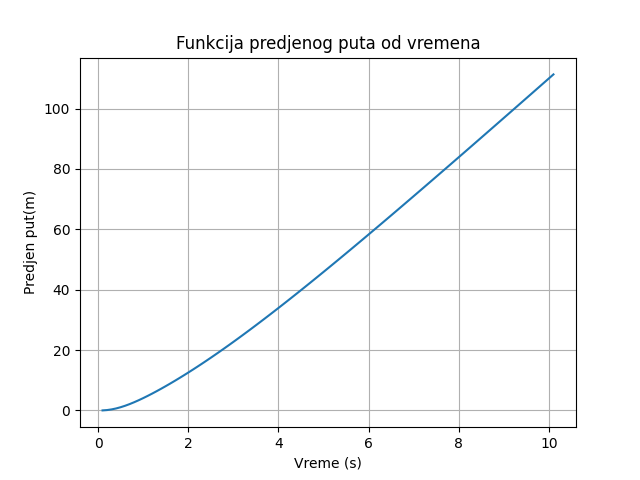

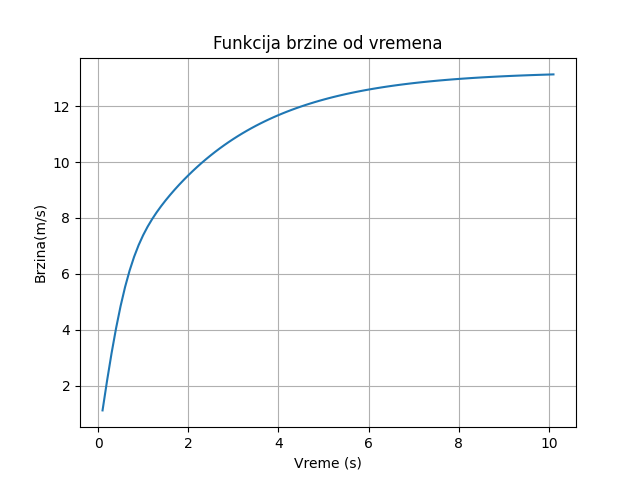

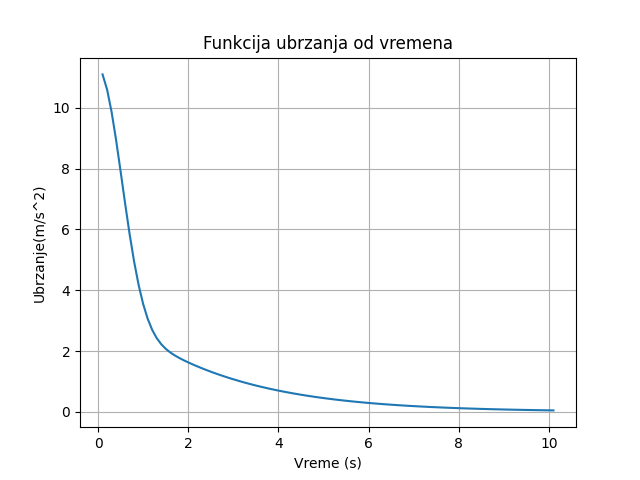

Svakoj od novih sila dodeljena je neka vrednost, dok sila otpora vazduha kreće od 0 kada je trkač u zgrčenom položaju. Tada imamo vreme prelaska iz čučnja u uspravan položaj koje je 0.45s. Kako vreme prolazi, što trkač više trči tako otpor vazduha postaje sve veći do momenta kada sila otpora vazduha postaje konstantna. Primetimo na graficima da se rezultati znatno razlikuju u odnosu na prethodne kako smo uveli nove sile. Tada će trkač pretrčati 100m za skoro 9s, a ne za 6.8 upravo zbog uticaja ovih sila koje smo dodali. Brzina nam se smanjila za oko 13m/s. Ubrzanje nam nije konstantno i sa vremenom se ono smanjuje i tezi nuli.

U narednom kodu predstavili smo standardnu silu, pokretačku silu, opadajuću silu sa porastom brzine i silu otpora vazduha u funkciji vremena, dok na grafikonima možemo videti kako one izgledaju i deluju. Nasa standardna sila je konstanta, što nam je trivijalno. Vidimo da nam je pokretačka brzina eksponencijalno manja srazmerno sa vremenom i teži ka 0.37 kada se vreme bude izjednačilo sa vremenskim ciljem, odnosno kada završimo trku. Što se tiče opadajuće sile sa porastom brzine, jasno nam je da srazmerno sa vremenom teži ka što manjoj vrednosti. Baš kao u realnom životu, kada nas uhvati umor mi zastanemo da odmorimo. Sila otpora vazduha je na početku nula jer je trkač u čučećem položaju i potom eksponencijalno raste zbog prelaska iz čučnja u uspravan položaj. <br>
Dakle, jasno se iz ovih grafikona može primetiti da se prethodno izložena objašnjenja osobina ovih sila poklapaju sa ponašanjem grafika. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

rho = 1.293 
A1 = 0.45  
CD = 1.2  
w=0
m = 80  
F= 400 
fc=488

v=0
t=0
dt=0.1

T=[]
F1=[]
FC1=[]
FV1=[]
D1=[]

while t<10:
    A=A1*(1-0.25*(math.e**(-(t/0.67)**2)))
    D=0.5*rho*CD*A*(v-w)**2
    Fc=fc*(math.e**(-(t/0.67)**2))
    Fv=-25.58*v
    a=(F+Fc+Fv-D)/m
    v=v+a*dt
    t+=dt
    T.append(t)
    F1.append(F)
    FC1.append(Fc)
    FV1.append(Fv)
    D1.append(D)

plt.plot(T,F1)
plt.xlabel('Vreme (s)')
plt.ylabel('Konstantna sila(F)')
plt.title('Sile')
plt.grid(True)
plt.show()

plt.plot(T,FC1)
plt.xlabel('Vreme (s)')
plt.ylabel('Pocetna pokretacka sila')
plt.title('Sile')
plt.grid(True)
plt.show()

plt.plot(T,FV1)
plt.xlabel('Vreme (s)')
plt.ylabel('Sila koja opada sa povecanjem mbrzine')
plt.title('Sile')
plt.grid(True)
plt.show()

plt.plot(T,D1)
plt.xlabel('Vreme (s)')
plt.ylabel('Sila otopra vazduha')
plt.title('Sile')
plt.grid(True)
plt.show()


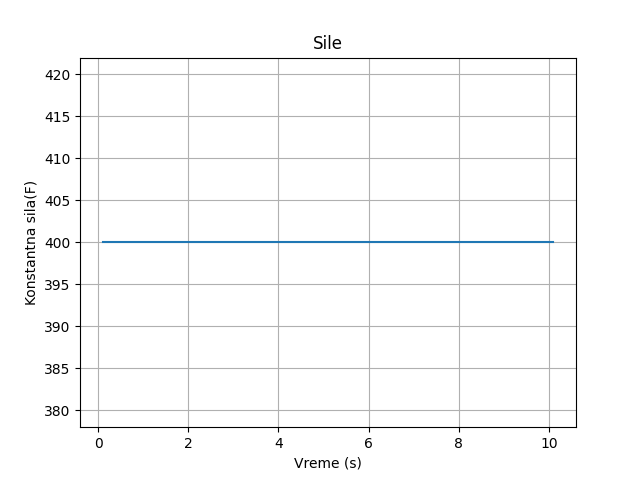

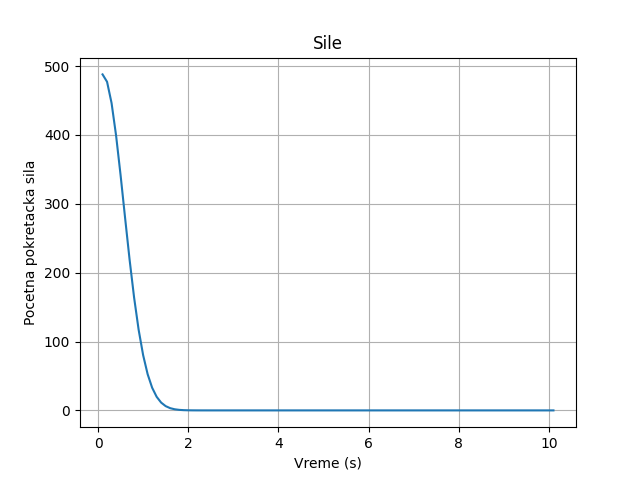

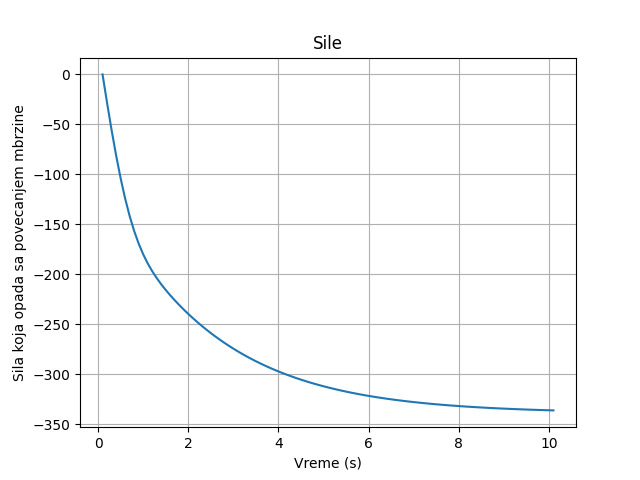

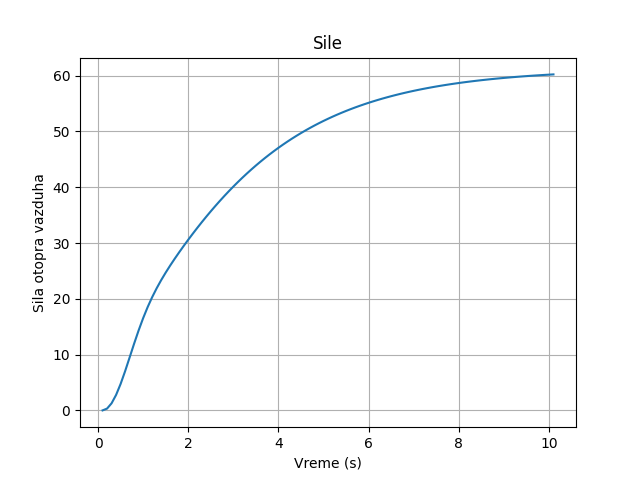

Šta bi bilo kada bismo imali definisanu brzinu vazduha, tačnije vetar u leđa? Neka nam je ona $w=1m/s$. Tada bi se vreme razlikovalo za samo 0.1s. Položaj i brzina bi se za nijansu povećali, a ubrzanje bi ostalo isto. <br>
Isti slučaj imamo ako posmatramo položaj, brzinu i ubrzanje u funkciji vremena sa našim silama koje utiču dodatno. <br>
Kada je reč o silama, konstantna sila, po običaju, ostaje ista. Baš kao i početna pokretačka sila i opadajuća sila sa porastom brzine. Međutim, primetimo da će sila otpora vazduha biti u ovom slučaju manja pri porastu srazmerno sa vremenom. Doduše, ponovo za mali broj. <br>
Zaključili smo da brzina vazduha ima značajan uticaj na performanse sprintera u trci na 100 metara. Vetar u leđa može pomoći sprinteru da održi ili čak poveća brzinu sa manje napora. Čak i ako nam je brzina vazduha zanemarljivo mala svakako ima koliko toliko uticaj na sprintera.